# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
from wordcloud import WordCloud
import gensim
from itertools import product
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

# Load Data

In [3]:
real_data=pd.read_csv("D:/coding/BTP/News _dataset/True.csv")
fake_data=pd.read_csv("D:/coding/BTP/News _dataset/Fake.csv")

In [4]:
real_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [5]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [6]:
print(real_data.shape,fake_data.shape)

(21417, 4) (23481, 4)


In [7]:
real_data.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

# Data Preprocessing

In [8]:
real_data=real_data.drop(8970,axis=0)

In [9]:
unknown=[]
for index,row in enumerate(real_data.text.values):
    try:
        record=row.split(' - ',maxsplit=1)
        record[1]
        assert(len(record[0])<120)
    except:
        unknown.append(index)

In [10]:
len(unknown)

228

In [11]:
publisher=[]
org_text=[]

for index,row in enumerate(real_data.text.values):
    if index in unknown:
        org_text.append(row)
        publisher.append('Unknown')
    else:
        record=row.split(' - ',maxsplit=1)
        publisher.append(record[0].strip())
        org_text.append(record[1].strip())

In [12]:
real_data['publisher']=publisher
real_data['text']=org_text

In [13]:
real_data.head()

,title,text,subject,date,publisher
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [14]:
print(real_data.shape,fake_data.shape)

(21416, 5) (23481, 4)


In [15]:
empty_fake_index=[index for index,text in enumerate(fake_data.text.tolist()) if str(text).strip()==""]

In [16]:
fake_data.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [17]:
real_data['text']=real_data['title']+" "+real_data['text']
fake_data['text']=fake_data['title']+" "+fake_data['text']

In [18]:
fake_data['text']=fake_data['text'].apply(lambda x:str(x).lower())
real_data['text']=real_data['text'].apply(lambda x:str(x).lower())

In [19]:
real_data['class']=1
fake_data['class']=0

In [20]:
real_data=real_data[['text','class']]
fake_data=fake_data[['text','class']]

In [21]:
data=pd.concat([real_data,fake_data])

In [22]:
data=data.sample(frac=1).reset_index(drop=True)

In [23]:
data

,text,class
0,awesome! president trump gives fatherly advice...,0
1,trump hails deals worth 'billions' with vietna...,1
2,"tillerson, lavrov agree to continue north kore...",1
3,did beyonce and jay z’s “vacation” to communis...,0
4,cnn panel breaks out in chaos after someone c...,0
...,...,...
44892,china upset by u.s. republican platform on sou...,1
44893,no kidding! here’s why hillary supporters will...,0
44894,"some republican pundits, politicians remain de...",1
44895,black gop candidate: party bosses told me ‘yo...,0


In [24]:
for i in range(data.shape[0]):
    row=data.iloc(0)
    a=row[i].text
    a=''.join(letter for letter in a if (letter.isalnum() or letter==' '))
    data.loc[i,'text']=a

In [25]:
data

,text,class
0,awesome president trump gives fatherly advice ...,0
1,trump hails deals worth billions with vietnam ...,1
2,tillerson lavrov agree to continue north korea...,1
3,did beyonce and jay zs vacation to communist c...,0
4,cnn panel breaks out in chaos after someone c...,0
...,...,...
44892,china upset by us republican platform on south...,1
44893,no kidding heres why hillary supporters will g...,0
44894,some republican pundits politicians remain def...,1
44895,black gop candidate party bosses told me you ...,0


In [26]:
y=data['class'].values

In [27]:
x=[d.split() for d in data['text'].tolist()]

In [28]:
dim=100
w2v=gensim.models.Word2Vec(sentences=x,vector_size=dim,window=10,min_count=1)

In [29]:
type(data['text'].tolist())

list

In [30]:
len(w2v.wv)

231834

In [31]:
w2v.wv['usa']

array([-1.1559559 ,  0.03128238, -1.593253  , -1.6491135 ,  2.1078632 ,
       -2.6546474 , -0.34149346,  1.0549041 , -1.2302619 ,  0.3664667 ,
       -1.0830226 ,  0.31261367,  0.26147538, -2.4189854 ,  0.45931172,
        1.6507204 , -1.3654513 ,  0.23104782, -2.0168867 , -1.1872078 ,
        0.99251264, -0.28944337,  0.5812651 , -1.1543342 ,  0.72303045,
        0.856996  , -1.1790637 ,  0.42866737,  0.92044413,  1.1645217 ,
        2.0976334 , -1.6464666 , -0.63361645, -0.2898522 , -0.3969476 ,
        1.1004424 ,  1.5698861 , -0.5911504 ,  2.9605227 , -1.2814198 ,
        0.4309336 , -2.3986936 ,  0.53463405, -3.3959422 ,  2.750091  ,
        1.994035  , -0.91110235,  1.6350445 , -1.191159  , -1.3669893 ,
       -2.7145202 ,  0.05162999,  0.82683283,  0.14887927,  0.9241226 ,
       -2.1085856 , -1.8766539 ,  0.73546934, -2.320937  , -0.11529483,
        2.3395054 , -0.3692159 , -0.6140339 , -1.3957584 , -1.0698835 ,
       -1.3994907 , -0.49528375,  0.9896243 , -3.3170643 , -0.52

In [32]:
w2v.wv.most_similar('us')

[('american', 0.5325412750244141),
 ('washingtons', 0.518746554851532),
 ('russias', 0.5162237882614136),
 ('russian', 0.5107115507125854),
 ('countrys', 0.5067863464355469),
 ('americas', 0.45666009187698364),
 ('natos', 0.4474741220474243),
 ('factoriesthe', 0.42877116799354553),
 ('nato', 0.4285197854042053),
 ('chinas', 0.4279332160949707)]

In [33]:
tokenizer=Tokenizer()

In [34]:
tokenizer.fit_on_texts(x)

In [35]:
X=tokenizer.texts_to_sequences(x)

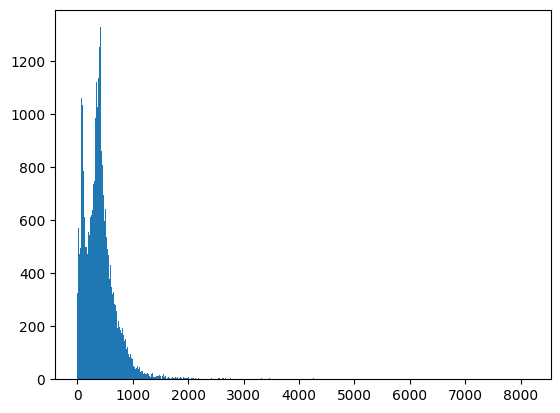

In [36]:
plt.hist([len(i) for i in X],bins=700)
plt.show()

In [37]:
nos=np.array([len(i) for i in X])
len(nos[nos>1000])

1584

In [38]:
X=pad_sequences(X,maxlen=1000)

In [39]:
len(X[101])

1000

In [40]:
vocab_size=len(tokenizer.word_index)+1

In [41]:
vocab=tokenizer.word_index

In [42]:
def get_weight_matrix(model):
    weight_matrix=np.zeros((vocab_size,100))
    for word,i in vocab.items():
        weight_matrix[i]=model.wv[word]
    return weight_matrix

In [43]:
embedding_vector=get_weight_matrix(w2v)

In [44]:
embedding_vector.shape

(231835, 100)

In [45]:
model=Sequential()
model.add(Embedding(vocab_size,output_dim=100,weights=[embedding_vector],input_length=1000,trainable=False))

In [46]:
model.add(LSTM(units=128))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23183500  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23300877 (88.89 MB)
Trainable params: 117377 (458.50 KB)
Non-trainable params: 23183500 (88.44 MB)
_________________________________________________________________


In [48]:
x_train,x_test,y_train,y_test=train_test_split(X,y)

In [49]:
model.fit(x_train,y_train,validation_split=0.3,epochs=2)

Epoch 1/2
737/737 [==============================] - 581s 777ms/step - loss: 0.1450 - acc: 0.9453 - val_loss: 0.0954 - val_acc: 0.9711
Epoch 2/2
737/737 [==============================] - 654s 887ms/step - loss: 0.0507 - acc: 0.9835 - val_loss: 0.1596 - val_acc: 0.9396


In [52]:
y_pred=(model.predict(x_test)>=0.5).astype(int)

351/351 [==============================] - 102s 291ms/step


0.9860133630289533

In [54]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      5850
           1       0.99      0.98      0.98      5375

    accuracy                           0.98     11225
   macro avg       0.98      0.98      0.98     11225
weighted avg       0.98      0.98      0.98     11225



In [50]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [53]:
accuracy_score(y_test,y_pred)

0.9425389755011135

Confusion matrix, without normalization


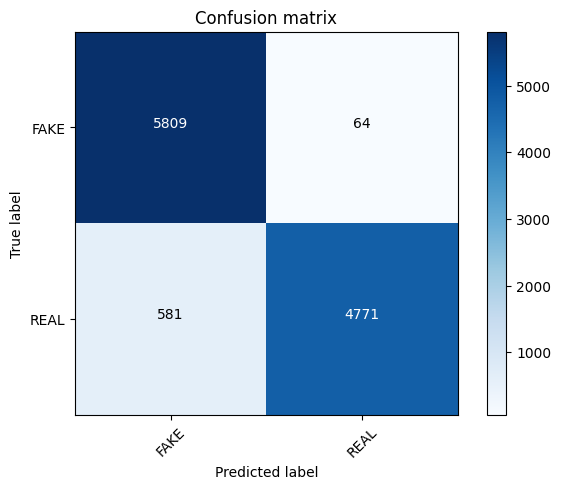

In [54]:
cm = confusion_matrix(y_test,y_pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [40]:
import pickle

In [51]:
model_path = 'D:\\coding\\BTP\\model2.h5'
w2v_path = 'D:\\coding\\BTP\\tfidfvect2.pkl'

# Save model
try:
    with open(model_path, 'wb') as model_file:
        pickle.dump(model, model_file)
    print(f"Model saved successfully at: {model_path}")
except Exception as e:
    print(f"Error saving model: {e}")
    
try:
    with open(w2v_path, 'wb') as w2v_file:
        pickle.dump(w2v, w2v_file)
    print(f"Model saved successfully at: {w2v_path}")
except Exception as e:
    print(f"Error saving model: {e}")

Model saved successfully at: D:\coding\BTP\model2.h5
Model saved successfully at: D:\coding\BTP\tfidfvect2.pkl


In [42]:
joblib_model = pickle.load(open('model2.pkl', 'rb'))
joblib_vect = pickle.load(open('tfidfvect2.pkl', 'rb'))

In [43]:
x=['this is a news']
x=tokenizer.texts_to_sequences(x)
x=pad_sequences(x,maxlen=1000)

In [44]:
yy=joblib_model.predict(x)

1/1 [==============================] - 1s 515ms/step


In [45]:
yy=(yy>=0.5).astype(int)

In [46]:
yy

array([[0]])